# Chapter 13 - Going Deeper - The Mechanics Of Pytorch

## The Key Features of PyTorch

It uses dynamic computational graphs, which have the advantage of being more flexible compared to its static counterparts. Dynamic computational graphs are debugging friendly: PyTorch allows for interleaving the graph  declaration and grapth evaluation steps. You can execute the code line by line while having access to all variables.

It has the ability to work with single or multiple **graphical processing units (GPUs)**. This allows users to train deep learning models very efficiently on large datasets and large-scale systems.

## Pytorch's Computation Graphs

PyTorch performs its computations based on a **directed acyclic graph (DAG)** 

### Understanding Computation Graphs

PyTorch relies on building a computatio ngraph at its core, and it uses this computation graph to derive relationships between tensors from the input all the way to the output. Let's say that we have rank 0 (scalar) tensors a, b and c and we want to evaluate z = 2 . (a - b) + c

![Alt text](../images/31.png)

### Creating a Graph in PyTorch

Let's look at a simple example that illustrates how to create a graph in PyTorch for evaluating z = 2 . (a - b) + c, as shown in the previous figure. The variables a, b and c are scalars, and we define these as PyTorch tensors. To create the graph, we can simply define a regular Python function with a, b and c as its input arguments, for example:

In [59]:
import torch 

def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

In [60]:
print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

Scalar Inputs: tensor(1)


In [61]:
print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

Rank 1 Inputs: tensor([1])


In [62]:
print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Rank 2 Inputs: tensor([[1]])


## PyTorch Tensor Objects for Storing and Updating Model Parameters

In PyTorch, when we want to train a model, we need to calculate gradients so we can update the model's parameters (like weights and biases). To do this, we use a special type of tensor that can track these gradients. We can create such a tensor by setting requires_grad=True when we define it. This tells PyTorch to keep track of operations on the tensor so it can compute gradients during backpropagation. It's important to note that only tensors with floating point or complex number data types can have gradients—integer tensors cannot be used for this.

In [63]:
a = torch.tensor(3.14, requires_grad=True)
print(a)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(b)

tensor(3.1400, requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [64]:
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)

w.requires_grad_()
print(w.requires_grad)

False
True


In [65]:
import torch.nn as nn

torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [66]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

## Computing Gradients Via Automatic Differentiation

Optimizing NNs requires computing the gradients of the loss with respect to the NN weights. This is required for optimization algorithms such as **stochastic gradient descent (SGD)**. In addition, gradients have other applciations, such as diagnosing the network to find out why an NN model is making a particular prediction for a test example. 

### Computing the Gradients of the Loss With Respect to Trainable Variables

Pytorch supports *automatic differentiation*, which can be thought of as an implementation of the *chain rule* for computing gradients of nested functions. Note that for the sake of simplicity, we will use the term *gradient to refer to both partial derivatives and gradients

In [67]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)
loss = (y-z).pow(2).sum()

In [68]:
loss.backward()
print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [69]:
print(2 * x * ((w * x + b) - y))

tensor([-0.5600], grad_fn=<MulBackward0>)


### Understanding Automatic Differentiation

Automatic differentiation represents a set of computational techniques for computing gradients of arbitrary arithmetic operations. During this process, gradients of a computation (expressed as a series of operations) are obtained by accumulating the gradients through repeated applications of the rule.

### Adversarial Examples

Computing gradients of the loss with respect to the input example is used for generating *adversarial examples*. In computer vision, adversarial examples are examples that are generated by adding some small, imperceptible noise (or pertubations) to the input example, which results in a deep NN misclassifying them. 

## Simplifying implementations of Common Architectures Via de torch.nn Module

### Implementing Models Based on nn.Sequential

With nn.Sequential, the layers stored inside the model are connected in a cascaded way. In the following example, we will build a model with two densely (fully) connected layers:

In [70]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
    )
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

We specified the layers and instantieated the model after passing the layers to the nn.Sequentil class. THe outpur of the first fully connected layer is used as the input to the first ReLU layer. The output of the first ReLU becomes the input for the second fully connected layer. Finally, the output of the second fully connected layer is used as the input to the second ReLU layer.

We can further configure these layers, for example, by applying different activation functions, initializers, or regularization methods to the parameters.

In the following code example, we will configure the first fully connected layer by specifying the initial value distribution for the weight. Then, we will configure the second fully connected layer by computing the L1 penalty term for the weight matrix:

In [71]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

### Choosing a Loss Function

Regarding the choices for optimization algorithms, SGD and Adam are the most widely used methods. The choice of loss function depends on the taks; for example, you might use mean square error loss for a regression problem.

The family of cross-entropy loss functions supplies the possible choices for classification tasks. 

In this example, we will use the SGD optimizer and cross-entropy loss for binary classification:

In [72]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Solving and XOR Classification Problem

The XOR classification problem is a classic problem for analyzing the capacity of a model with regard to capturing the nonlinear decision boundary between two classes. We generate a toy dataset of 200 training examples with two features (x0, x1) drawn from a uniform distribution between [–1, 1). Then, we assign the ground truth label for training example i according to the following rule:

![Alt text](../images/32.png)


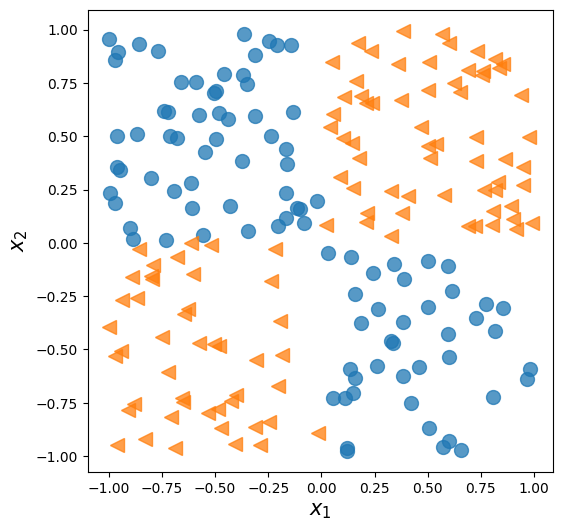

In [73]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In the previous subsection, we covered the essential tools that we need to implement a classifier in PyTorch. We now need to decide what architecture we should choose for this task and dataset. As a general rule of thumb, the more layers we have, and the more neurons we have in each layer, the larger the capacity of the model will be. Here, the model capacity can be thought of as a measure of how readily the model can approximate complex functions. While having more parameters means the network can fit more complex functions, larger models are usually harder to train (and prone to overfitting). In practice, it is always a good idea to start with a simple model as a baseline, for example, a single-layer NN like logistic regression:

In [74]:
model = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid()
        )
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

After defining the model, we will initialize the cross-entropy loss function for binary classification and the SGD optimizer:

In [75]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Next, we will create a data loader that uses a batch size of 2 for the train data:

In [76]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Now we will train the model for 200 epochs and record a history of training epochs:

In [77]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
    accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Notice that the history of training epochs includes the train loss and validation loss and the train accuracy and validation accuracy, which is useful for visual inspection after training. In the following code, we will plot the learning curves, including the training and validation loss, as well as their accuracies.

Text(0.5, 0, 'Epochs')

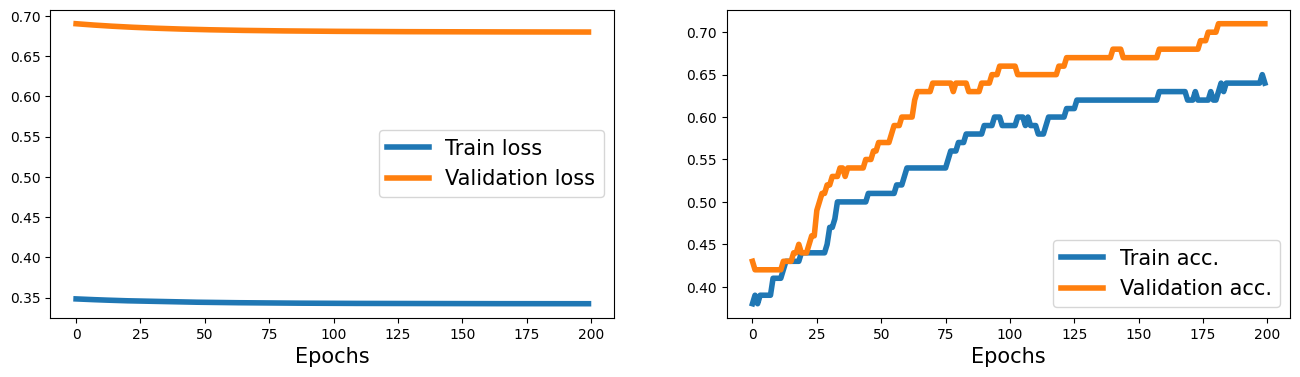

In [78]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [79]:
model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
            )

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
model


Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [80]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

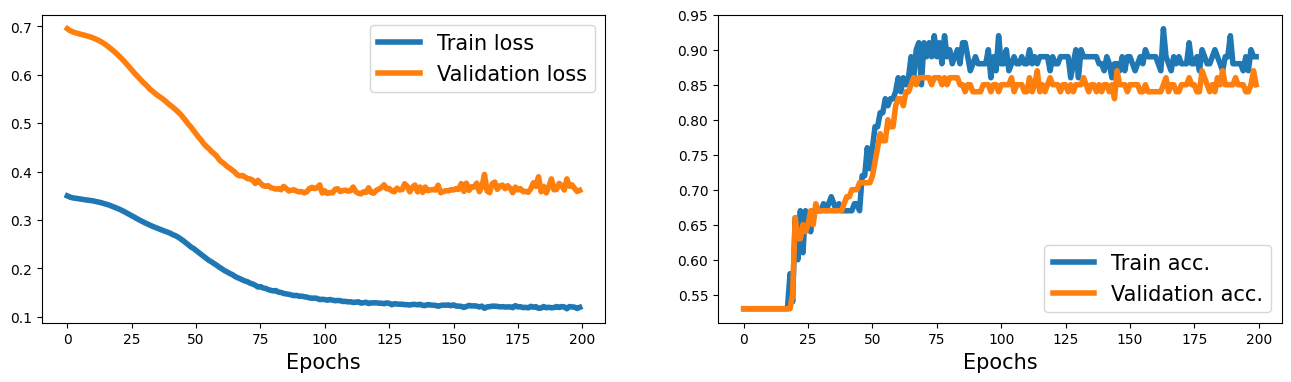

In [81]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Now, we can see that the model is able to derive a nonlinear decision boundary for this data, and the model reaches 100 percent accuracy on the training dataset. The validation dataset’s accuracy is 95 percent, which indicates that the model is slightly overfitting.

### Making Model BUilding More Flexible With nn.Module

In the previous example, we used the PyTorch Sequential class to create a fully connected NN with multiple layers. This is a very common and convenient way of building models. However, it unfortunately doesn’t allow us to create more complex models that have multiple input, output, or intermediate branches. That’s where nn.Module comes in handy.

The alternative way to build complex models is by subclassing nn.Module. 

In [82]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        s = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, s]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x

In [83]:
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [84]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

To compute the decision boundary of our model, we need to add a predict() method in the MyModule class:

In [85]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        s = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, s]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

/tmp/ipykernel_127940/59857916.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


AttributeError: 'MyModule' object has no attribute 'predict'

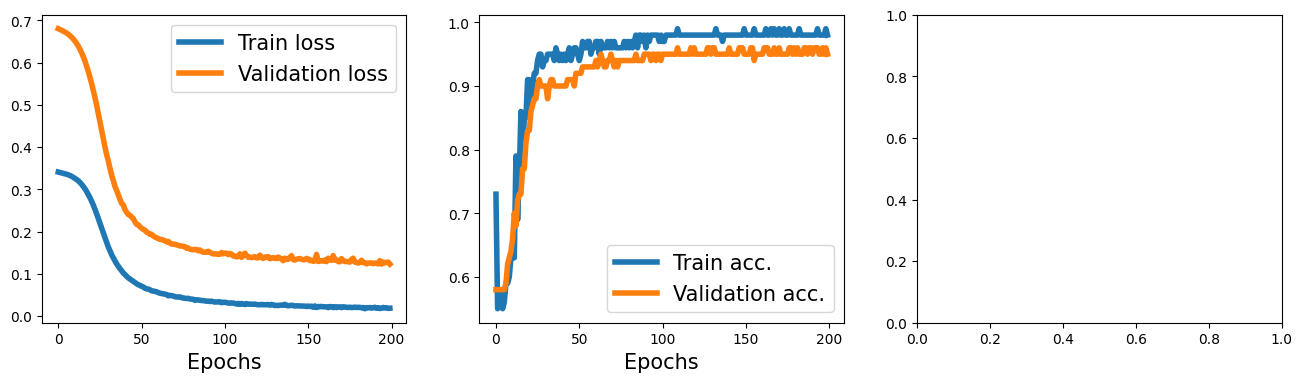

In [87]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                    y=y_valid.numpy().astype(np.integer),
                    clf=model)
ax.set_xlabel(r'$x_1$', size=15)

### Writing Custom Layers in PyTorch

In cases where we want to define a new layer that is not already suppoerted by PyTorch, we can define a new class derived from the nn.Module class. This is especially useful when designing a new layer or customizing an existing layer.

In [90]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

Before we go a step further and use our custom NoisyLinear layer in a model, let’s test it in the context
of a simple example.
1. In the following code, we will define a new instance of this layer, and execute it on an input
tensor. Then, we will call the layer three times on the same input tensor:

In [91]:
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
x = torch.zeros((1, 4))
print(noisy_layer(x, training=True))
print(noisy_layer(x, training=True))
print(noisy_layer(x, training=False))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


2. Now, let’s create a new model similar to the previous one for solving the XOR classification task.
As before, we will use the nn.Module class for model building, but this time, we will use our
NoisyLinear layer as the first hidden layer of the multilayer perceptron. The code is as follows:

In [92]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        ...
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

3. Similarly, we will train the model as we did previously. At this time, to compute the prediction on the training batch, we use pred = model(x_batch, True)[:, 0] instead of pred =
model(x_batch)[:, 0]:

In [93]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = (
        (pred>=0.5).float() == y_batch
        ).float()
        accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= 100/batch_size
    accuracy_hist_train[epoch] /= 100/batch_size
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

4. After the model is trained, we can plot the losses, accuracies, and the decision boundary:

/tmp/ipykernel_127940/1457808269.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


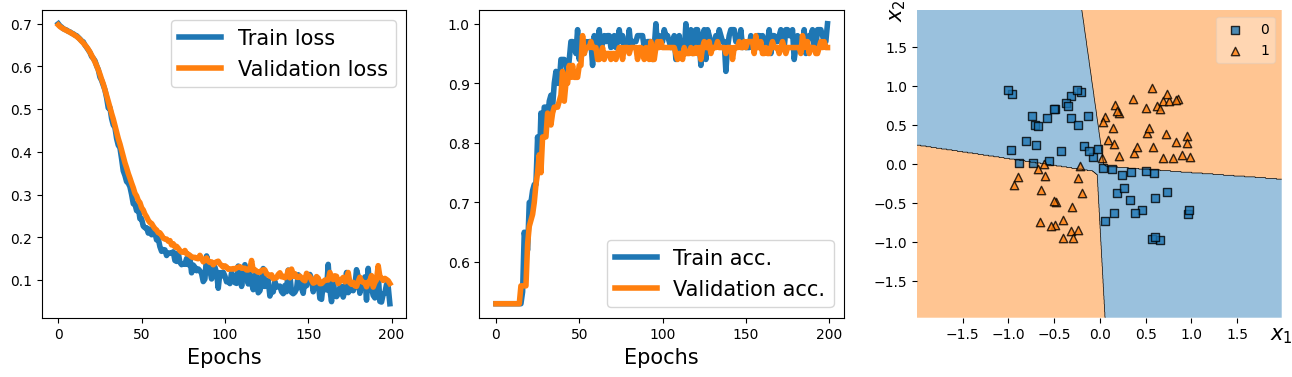

In [94]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(
    X=x_valid.numpy(),
    y=y_valid.numpy().astype(np.integer),
    clf=model
    )
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Project One - Predicting the Fuel Efficiency of a Car

In this section, we will work on a real-world porject of predicting the fuel efficiency of a car in miles per gallon (MPG).

### Working With Feature Columns

![Alt text](../images/33.png)

We are going to treat five features from the Auto MPG dataset (number of cylinders, displacement, horsepower, weight, and acceleration) as “numeric” (here, continuous) features. The model year can be regarded as an ordered categorical (ordinal) feature. Lastly, the manufacturing origin can be regarded as an unordered categorical (nominal) feature with three possible discrete values, 1, 2, and 3, which correspond to the US, Europe, and Japan, respectively.

Let’s first load the data and apply the necessary preprocessing steps, including dropping the incomplete rows, partitioning the dataset into training and test datasets, as well as standardizing the continuous features:

In [95]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/' \
    'machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                na_values = "?", comment='\t',
                sep=" ", skipinitialspace=True)

## drop the NA rows
df = df.dropna()
df = df.reset_index(drop=True)

## train/test splits:

import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(
                                            df, train_size=0.8, random_state=1
                                            )
train_stats = df_train.describe().transpose()

numeric_column_names = [
        'Cylinders', 'Displacement',
        'Horsepower', 'Weight',
        'Acceleration'
        ]

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std

df_train_norm.tail()

/tmp/ipykernel_127940/2793962471.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.8243028   0.3511267  -0.8243028  -0.8243028  -0.8243028   1.52655621
  0.3511267  -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028
  0.3511267   1.52655621  1.52655621  1.52655621  0.3511267   1.52655621
 -0.8243028   0.3511267   1.52655621 -0.8243028  -0.8243028   0.3511267
 -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028   1.52655621
  0.3511267  -0.8243028   0.3511267  -0.8243028  -0.8243028   1.52655621
 -0.8243028   1.52655621  1.52655621 -0.8243028  -0.8243028  -0.8243028
 -0.8243028   0.3511267  -0.8243028   1.52655621 -0.8243028  -0.8243028
  1.52655621 -0.8243028  -0.8243028  -0.8243028   1.52655621  1.52655621
  0.3511267   0.3511267   1.52655621 -0.8243028  -0.8243028   1.52655621
  1.52655621 -0.8243028  -0.8243028   0.3511267   1.52655621 -0.8243028
  0.3511267  -0.8243028   1.52655621  1.5265

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


The pandas DataFrame that we created via the previous code snippet contains five columns with values of the type float. These columns will constitute the continuous features.

Next, let’s group the rather fine-grained model year (ModelYear) information into buckets to simplify the learning task for the model that we are going to train later. Concretely, we are going to assign each car into one of four year buckets, as follows:

![Alt text](../images/34.png)

In [96]:
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

numeric_column_names.append('Model Year Bucketed')

In [97]:
from torch.nn.functional import one_hot

total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(
                df_train_norm['Origin'].values) % total_origin)
x_train_numeric = torch.tensor(
                        df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
origin_encoded = one_hot(torch.from_numpy(
                    df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(
                        df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [98]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

### Training a DNN Regression Model

In [99]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Next, we will build a model with two fully connected layers where one has 8 hidden units and another has 4:

In [100]:
hidden_units = [8, 4]
input_size = x_train.shape[1]
all_layers = []

for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

After defining the model, we will define the MSE loss function for regression and use stochastic gradient descent for optimization:

In [101]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Now we will train the model for 200 epochs and display the train loss for every 20 epochs:

In [103]:
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss ' f'{loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 536.1047
Epoch 20 Loss 8.4361
Epoch 40 Loss 7.8695
Epoch 60 Loss 7.1891
Epoch 80 Loss 6.7062
Epoch 100 Loss 6.7599
Epoch 120 Loss 6.3124
Epoch 140 Loss 6.6864
Epoch 160 Loss 6.7648
Epoch 180 Loss 6.2156


After 200 epochs, the train loss was around 5. We can now evaluate the regression performance of the trained model on the test dataset. To predict the target values on new data points, we can feed their features to the model:

In [104]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 9.6133
Test MAE: 2.1211


## Project Two - Classifying MNIST Handwritten Digits

First, we are going to load the MNIST dataset using the torchvision module.

1. The setup step includes loading the dataset and specifying hyperparameters (the size of the
train set and test set, and the size of mini-batches):

In [108]:
import torchvision
from torchvision import transforms

image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_dataset = torchvision.datasets.MNIST(
                            root=image_path, train=True,
                            transform=transform, download=False
                            )
mnist_test_dataset = torchvision.datasets.MNIST(
                            root=image_path, train=False,
                            transform=transform, download=False
                            )
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,
                    batch_size, shuffle=True)

2. We preprocess the input features and the labels. The features in this project are the pixels
of the images we read from Step 1. We defined a custom transformation using torchvision.
transforms.Compose. In this simple case, our transformation consisted only of one method,
ToTensor(). The ToTensor() method converts the pixel features into a floating type tensor
and also normalizes the pixels from the [0, 255] to [0, 1] range. The labels are integers from 0 to 9 representing ten digits. Hence, we don’t need to do any scaling or further conversion. Note that we can access the raw pixels using the data attribute, and don’t forget to scale them to the range [0, 1].

We will construct the model in the next step once the data is preprocessed.

3. Construct the NN model:

In [109]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()]

for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

4. Use the model for training, evaluation, and prediction:

In [110]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
torch.manual_seed(1)
num_epochs = 20

for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (
        torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f'Epoch {epoch} Accuracy 'f'{accuracy_hist_train:.4f}')

Epoch 0 Accuracy 0.8531
Epoch 1 Accuracy 0.9287
Epoch 2 Accuracy 0.9413
Epoch 3 Accuracy 0.9506
Epoch 4 Accuracy 0.9558
Epoch 5 Accuracy 0.9592
Epoch 6 Accuracy 0.9627
Epoch 7 Accuracy 0.9649
Epoch 8 Accuracy 0.9673
Epoch 9 Accuracy 0.9690
Epoch 10 Accuracy 0.9711
Epoch 11 Accuracy 0.9729
Epoch 12 Accuracy 0.9737
Epoch 13 Accuracy 0.9747
Epoch 14 Accuracy 0.9766
Epoch 15 Accuracy 0.9778
Epoch 16 Accuracy 0.9780
Epoch 17 Accuracy 0.9798
Epoch 18 Accuracy 0.9807
Epoch 19 Accuracy 0.9815


In [111]:
pred = model(mnist_test_dataset.data / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9647


The test accuracy is 95.6 percent.

## Higher-Level PyTorch APIs: A Short Introduction To PyTorch-Lightning

### Setting Up The PyTorch Lightning Model

We start by implementing the model, which we will train in the next subsections. Defining a model for Lightning is relatively straightforward as it is based on regular Python and PyTorch code. All that is required to implement a Lightning model is to use LightningModule instead of the regular PyTorch module. To take advantage of PyTorch’s convenience functions, such as the trainer API and automatic logging, we just define a few specifically named methods

In [139]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
from torchmetrics import Accuracy

class MultiLayerPerceptron(pl.LightningModule):
    def __init__(self, image_shape=(1, 28, 28), hidden_units=(32, 16)):
        super().__init__()

        # new PL attributes:
        self.train_acc = Accuracy(task="multiclass", num_classes=10)
        self.valid_acc = Accuracy(task="multiclass", num_classes=10)
        self.test_acc = Accuracy(task="multiclass", num_classes=10)

        # Model similar to previous section:
        input_size = image_shape[0] * image_shape[1] * image_shape[2]
        all_layers = [nn.Flatten()]
        for hidden_unit in hidden_units:
            layer = nn.Linear(input_size, hidden_unit)
            all_layers.append(layer)
            all_layers.append(nn.ReLU())
            input_size = hidden_unit
        all_layers.append(nn.Linear(hidden_units[-1], 10))
        self.model = nn.Sequential(*all_layers)

    def forward(self, x):
        x = self.model(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim=1)
        self.train_acc.update(preds, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss
    
    def on_train_epoch_end(self, outs=None):
        self.log("train_acc", self.train_acc.compute())

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim=1)
        self.valid_acc.update(preds, y)
        self.log("valid_loss", loss, prog_bar=True)
        self.log("valid_acc", self.valid_acc.compute(), prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim=1)
        self.test_acc.update(preds, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_acc.compute(), prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

### Setting Up The Data Loaders For Lightning

There are three main ways in which we can prepare the dataset for Lightning. We can:

• Make the dataset part of the model

• Set up the data loaders as usual and feed them to the fit method of a Lightning Trainer—the
Trainer is introduced in the next subsection

• Create a LightningDataModule

Here, we are going to use a LightningDataModule, which is the most organized approach. The
LightningDataModule consists of five main methods, as we can see in the following: 

In [140]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms

class MnistDataModule(pl.LightningDataModule):
    def __init__(self, data_path='./'):
        super().__init__()
        self.data_path = data_path
        self.transform = transforms.Compose([transforms.ToTensor()])

    def prepare_data(self):
        MNIST(root=self.data_path, download=True)
    
    def setup(self, stage=None):
        # stage is either 'fit', 'validate', 'test', or 'predict'
        # here note relevant
        mnist_all = MNIST(
        root=self.data_path,
        train=True,
        transform=self.transform,
        download=False
        )
        self.train, self.val = random_split(mnist_all, [55000, 5000], 
                                            generator=torch.Generator().manual_seed(1))
        self.test = MNIST(
        root=self.data_path,
        train=False,
        transform=self.transform,
        download=False
        )

    def train_dataloader(self):
        return DataLoader(self.train, batch_size=64, num_workers=4)
    
    def val_dataloader(self):
        return DataLoader(self.val, batch_size=64, num_workers=4)
    
    def test_dataloader(self):
        return DataLoader(self.test, batch_size=64, num_workers=4)

### Training The Model Using The PyTorch Lightning Trainng Class

In [141]:
torch.manual_seed(1)
mnist_dm = MnistDataModule()

In [142]:
mnistclassifier = MultiLayerPerceptron()
try:
    # Force CPU if CUDA is buggy or unavailable
    trainer = pl.Trainer(max_epochs=10, accelerator='cpu')
except:
    trainer = pl.Trainer(max_epochs=10)

trainer.fit(model=mnistclassifier, datamodule=mnist_dm)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/nathalie/Desktop/projects/ml-book/ml-book/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | train_acc | MulticlassAccuracy | 0      | train
1 | valid_acc | MulticlassAccuracy | 0      | train
2 | test_acc  | MulticlassAccuracy | 0      | train
3 | model     | Sequential         | 25.8 K | train
---------------------------------------------------------
25.8 K    Trainable params
0         Non-trainable params
25.8 K    Total params
0.103     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|██████████| 860/860 [00:07<00:00, 114.85it/s, v_num=6, train_loss=0.260, valid_loss=0.166, valid_acc=0.936]  

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 860/860 [00:07<00:00, 114.63it/s, v_num=6, train_loss=0.260, valid_loss=0.166, valid_acc=0.936]


### Evaluating the Model Using TensorBoard

In [144]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 151162), started 0:00:23 ago. (Use '!kill 151162' to kill it.)

In [147]:
%reload_ext tensorboard